📂 正在读取数据: D:\App\Pycharm\1217MovieSchedulingSimulation\logs\main_case\evaluation_results.csv
✅ 成功加载 156 条记录。
📂 图片将保存至: D:\App\Pycharm\1217MovieSchedulingSimulation\jupyters\plots\main_analysis

🚀 开始绘制高级感图表，共 39 个案例...
🎨 绘图: 《坚如磐石》 - [Black Horse]


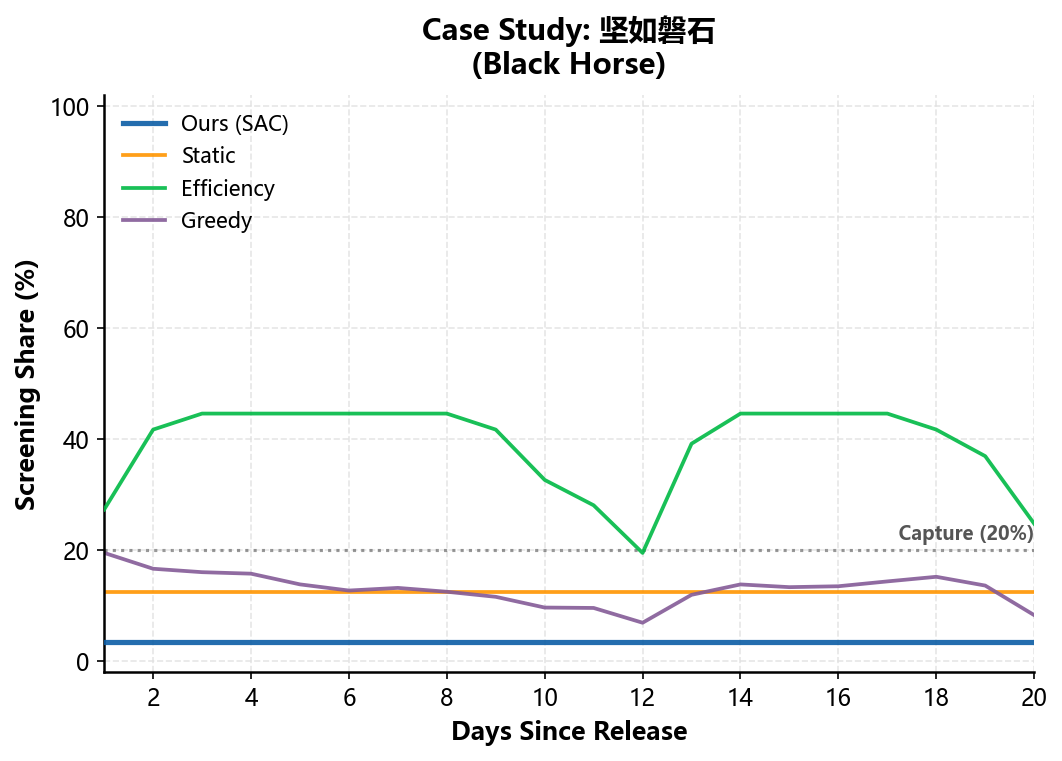

🎨 绘图: 《前任4：英年早婚》 - [Black Horse]


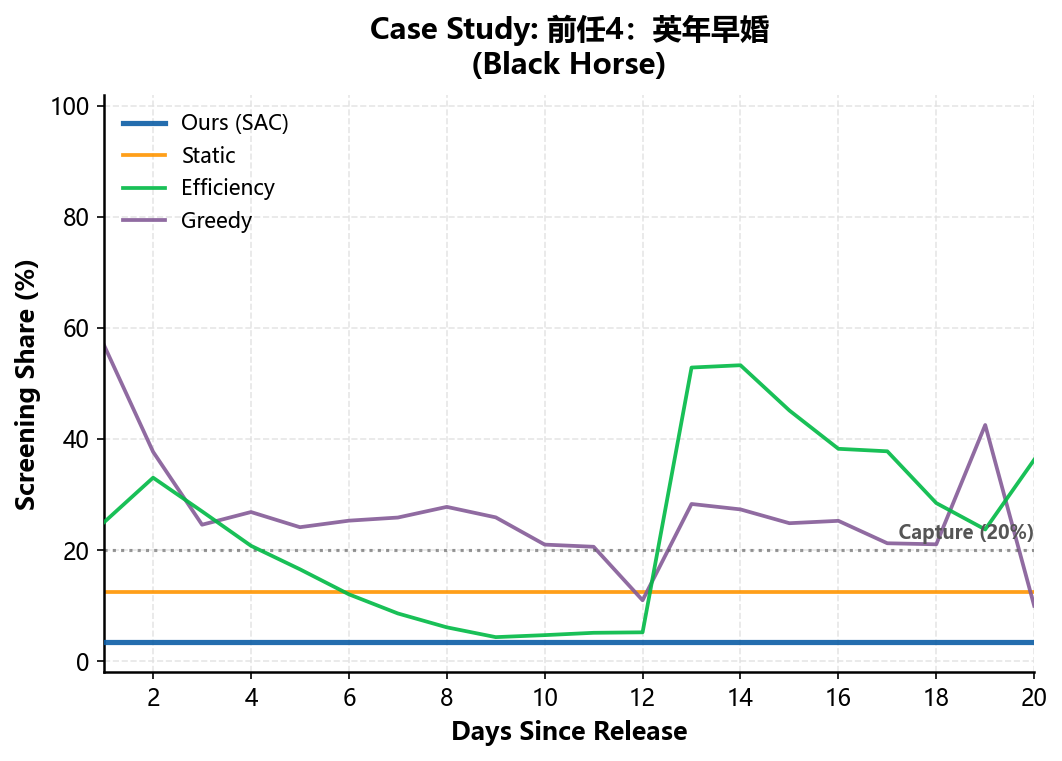

🎨 绘图: 《金手指》 - [Black Horse]


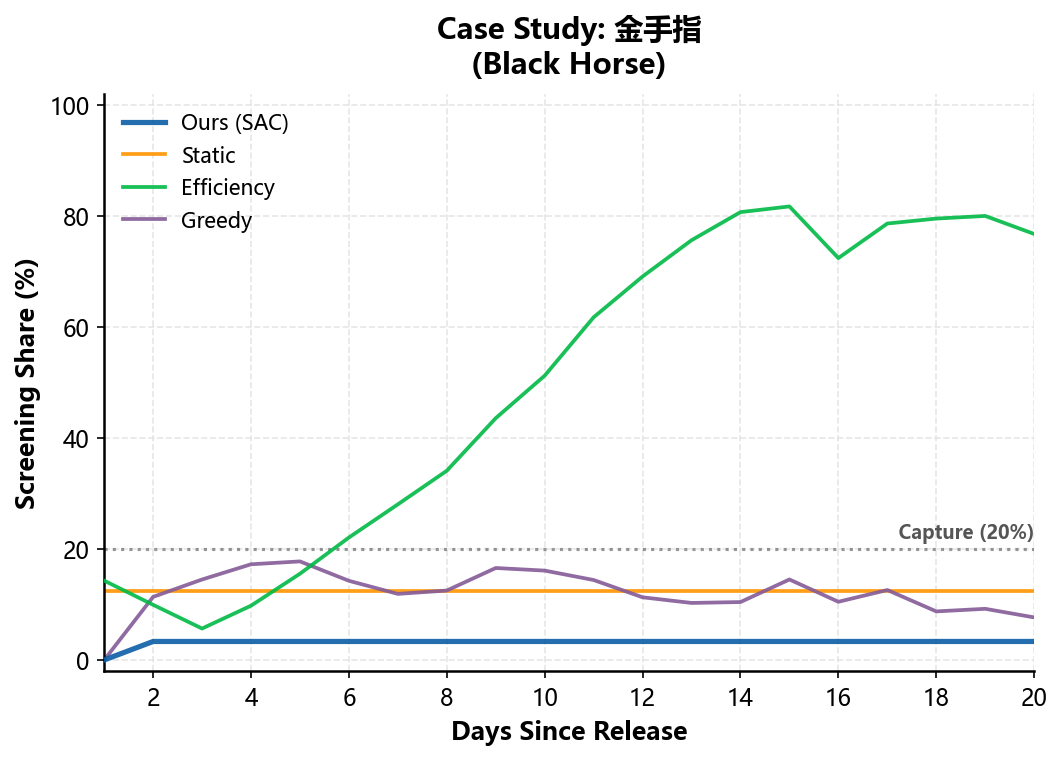

🎨 绘图: 《第二十条》 - [Black Horse]


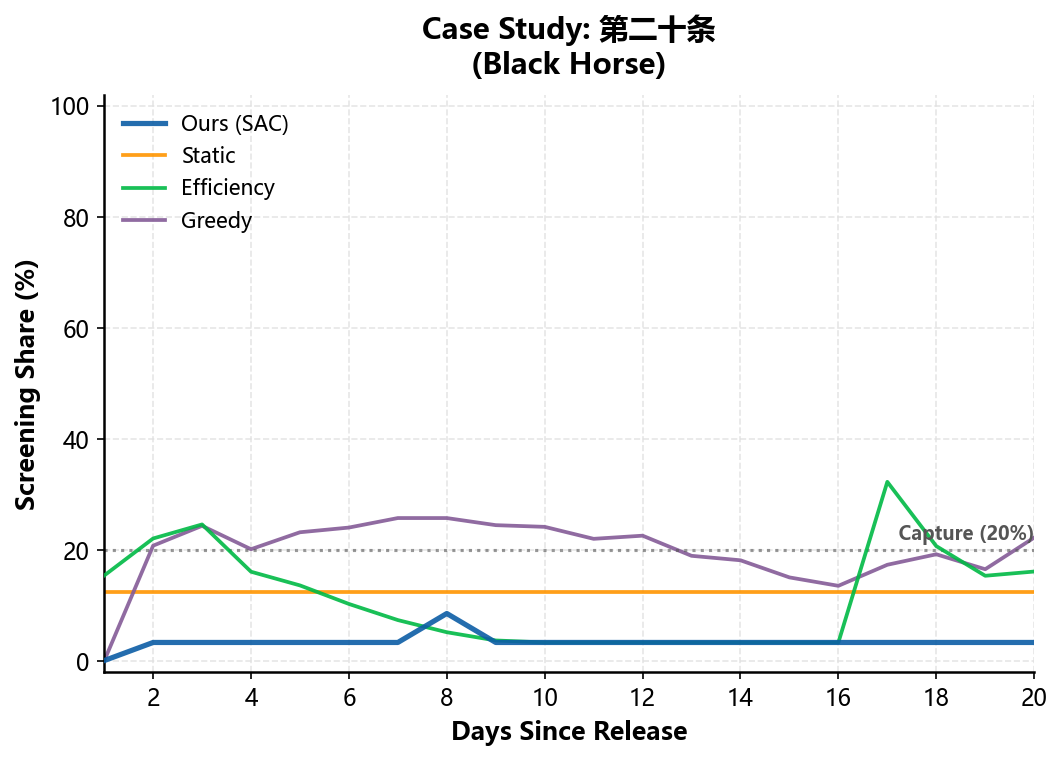

🎨 绘图: 《熊出没·逆转时空》 - [Black Horse]


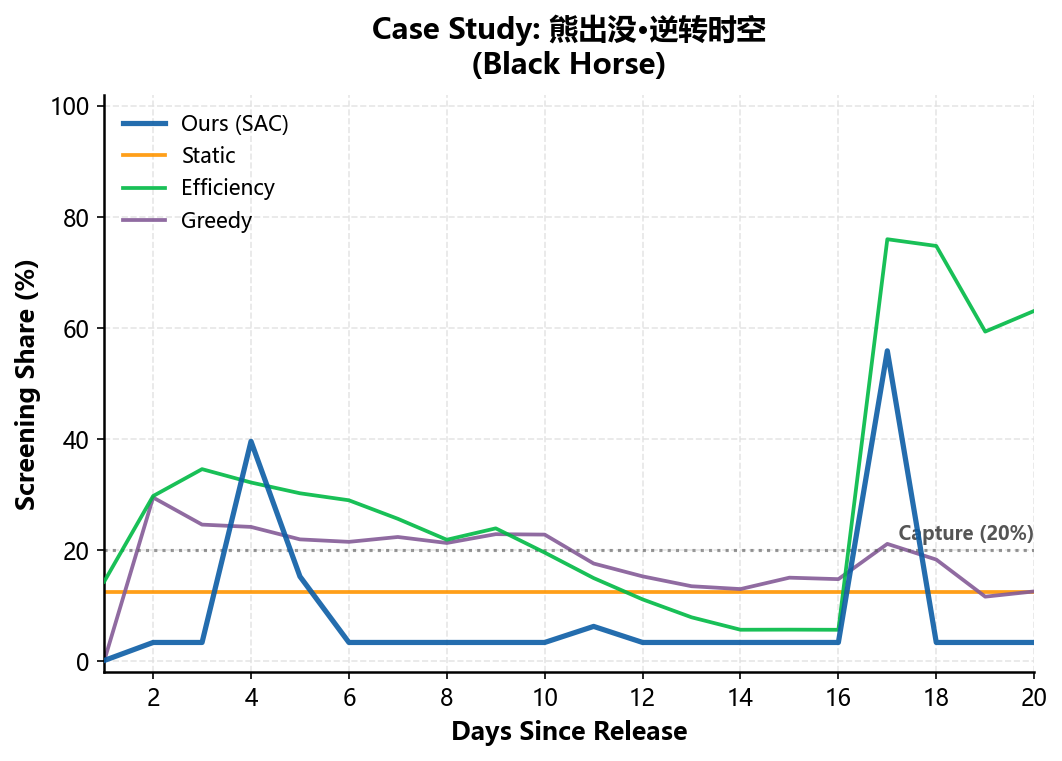

🎨 绘图: 《周处除三害》 - [Black Horse]


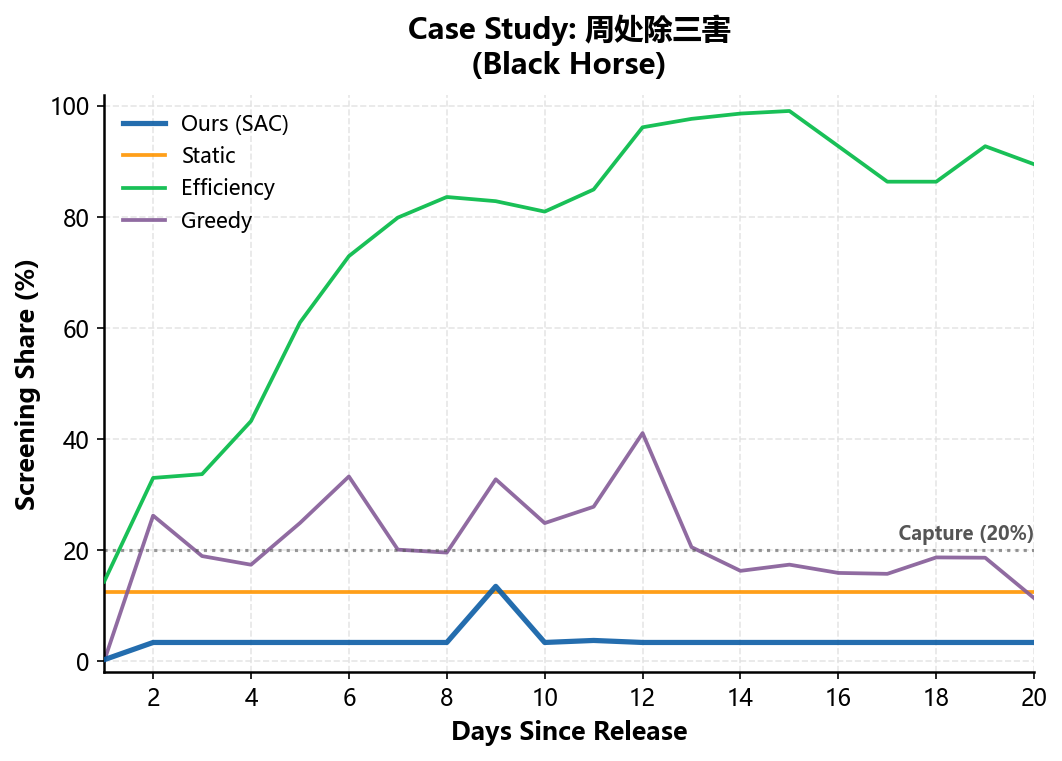

🎨 绘图: 《你想活出怎样的人生》 - [Black Horse]


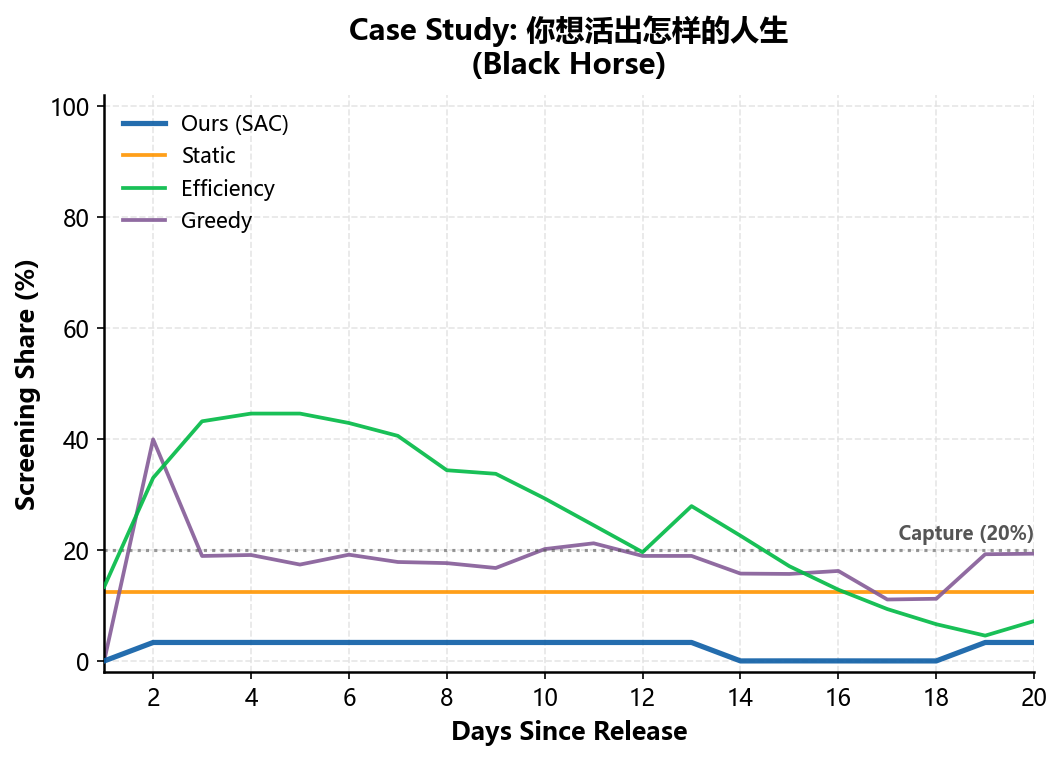

🎨 绘图: 《末路狂花钱》 - [Black Horse]


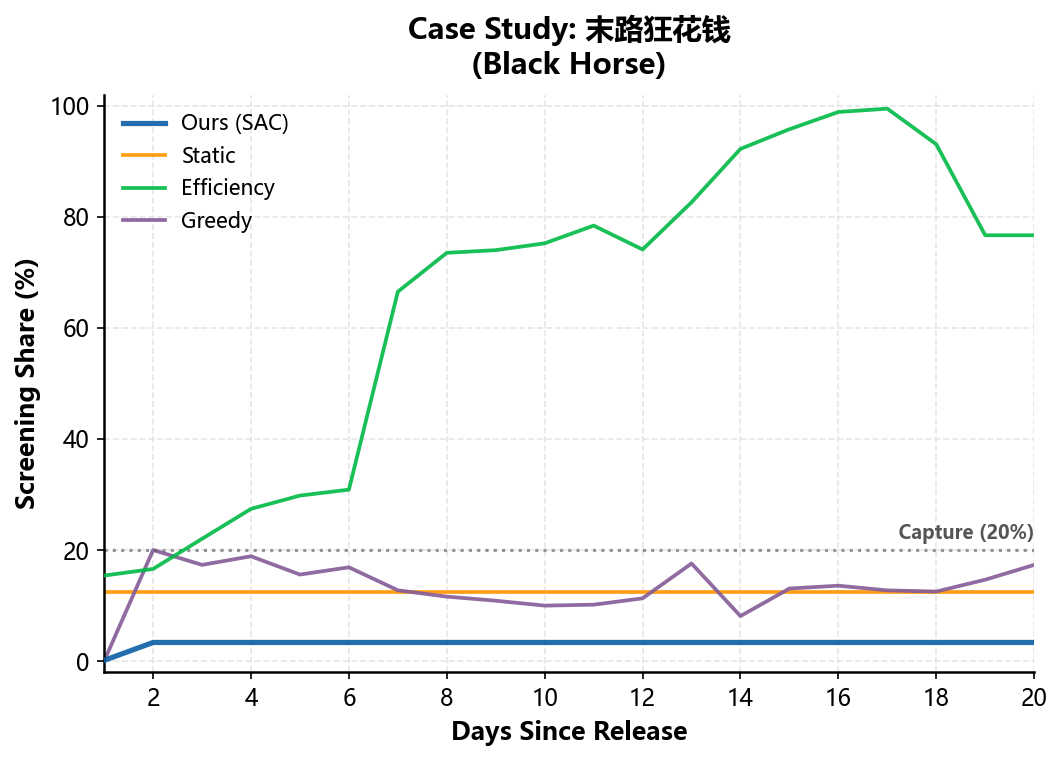

🎨 绘图: 《九龙城寨之围城》 - [Black Horse]


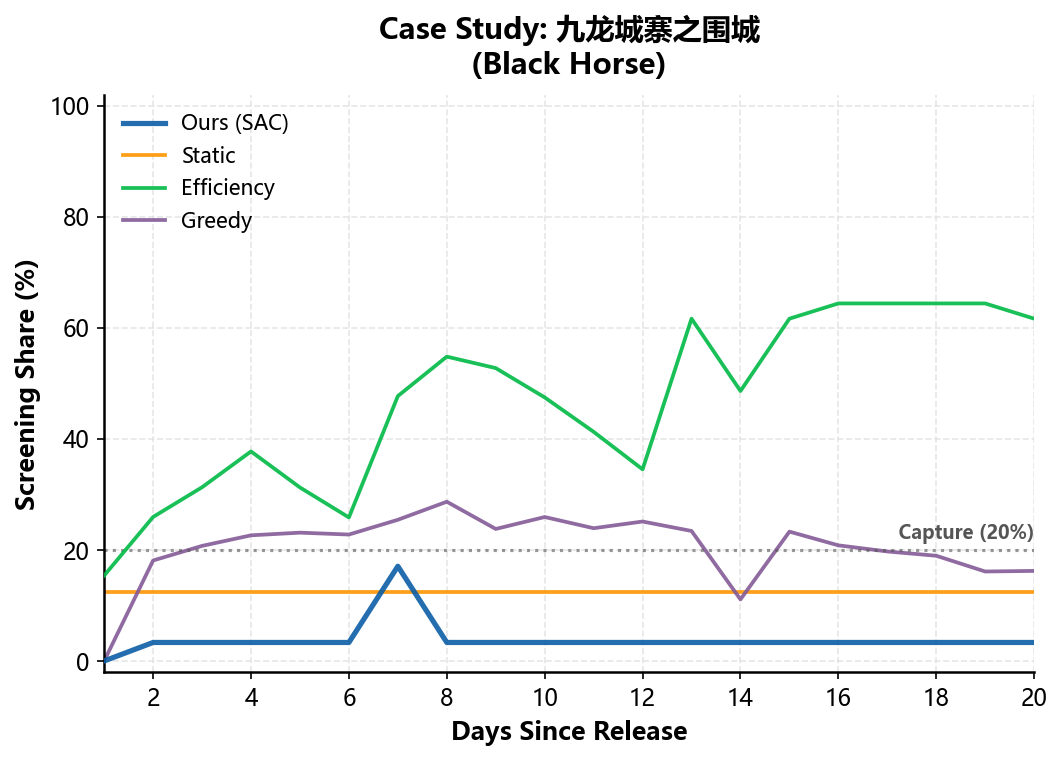

🎨 绘图: 《排球少年!! 垃圾场决战》 - [Rotten/Flop]


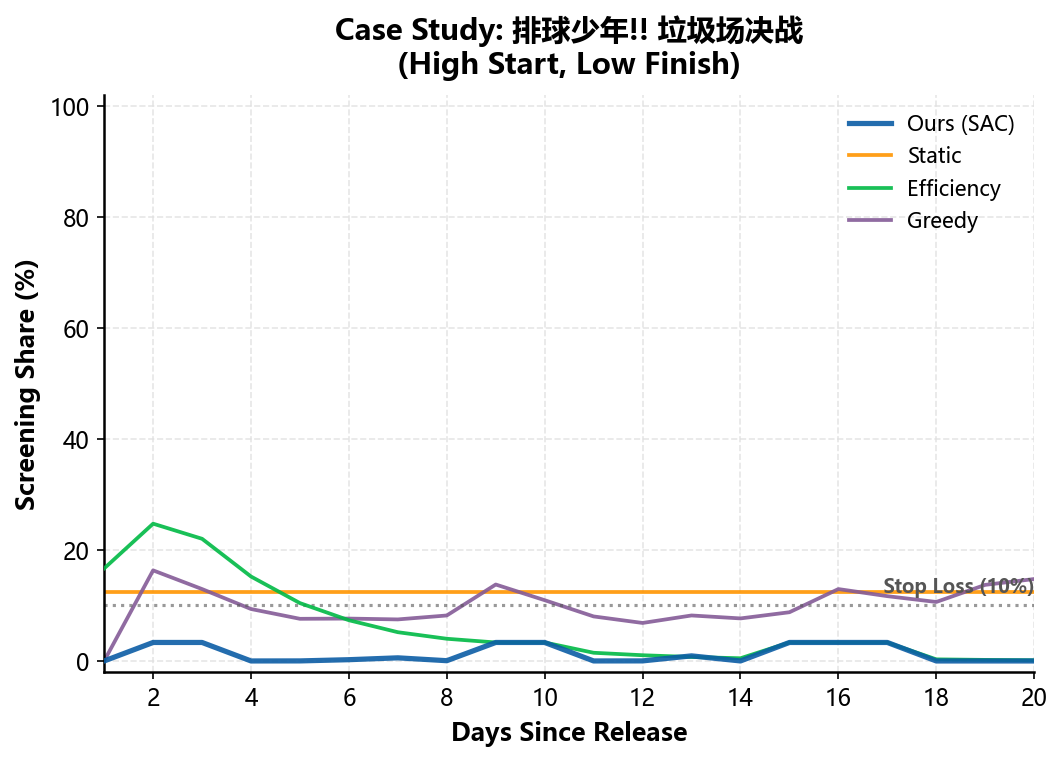

🎨 绘图: 《异形：夺命舰》 - [Black Horse]


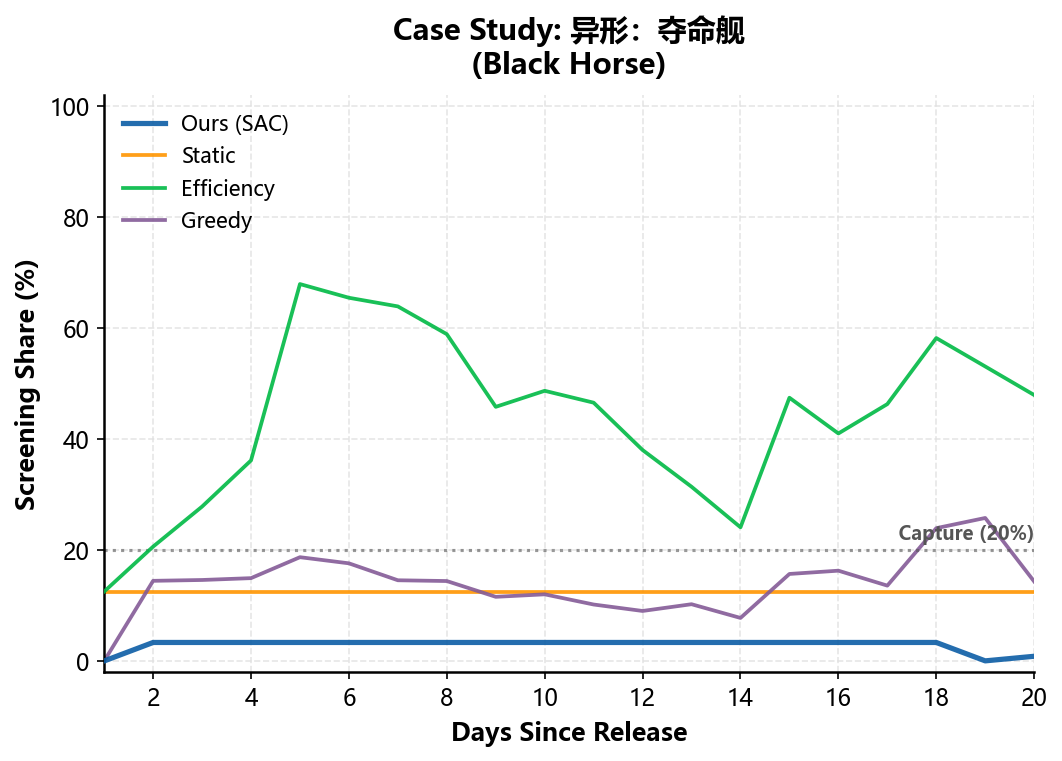

🎨 绘图: 《哆啦A梦：大雄的地球交响乐》 - [Rotten/Flop]


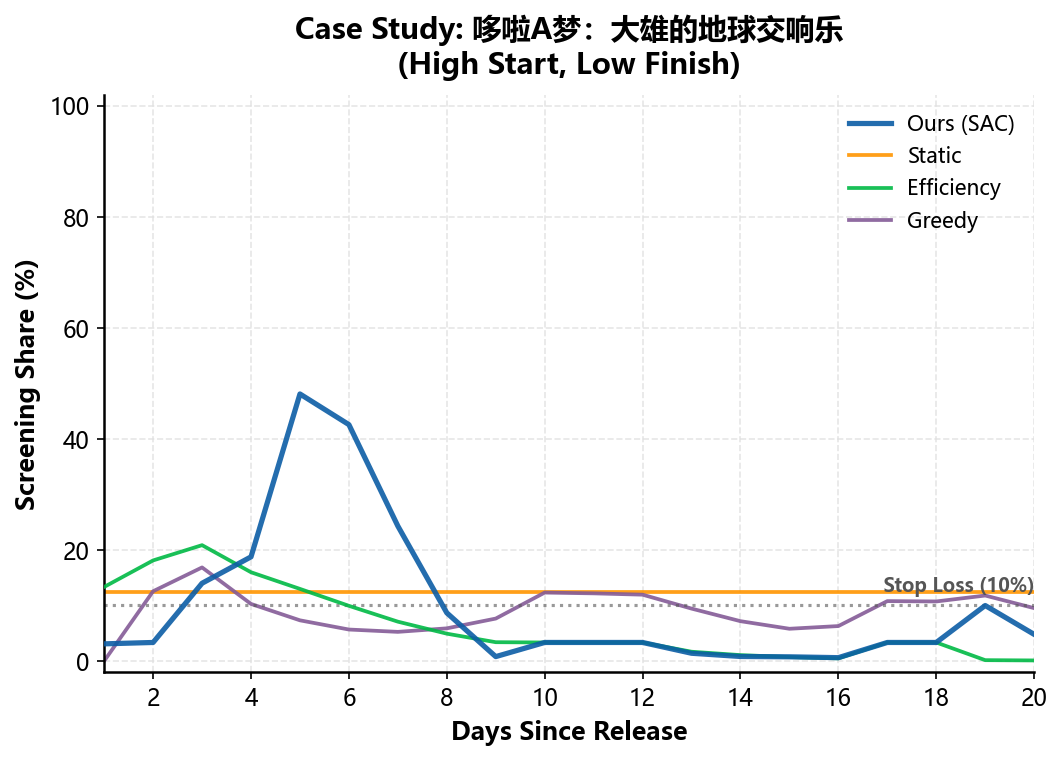

🎨 绘图: 《异人之下》 - [Rotten/Flop]


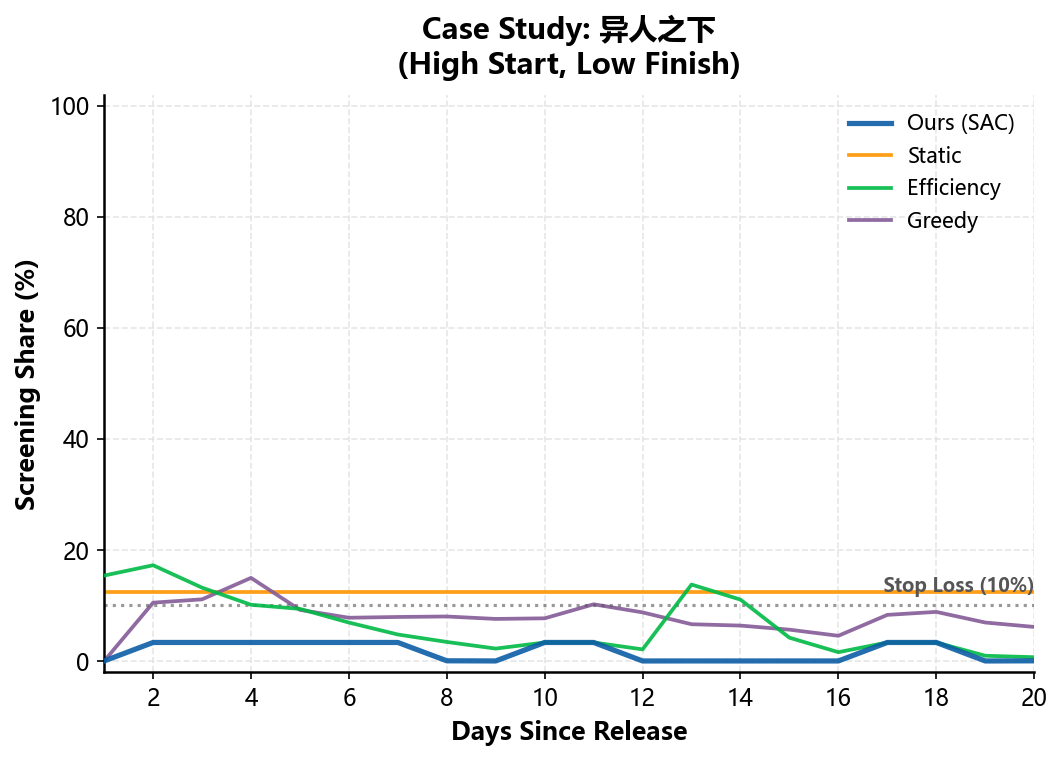

------------------------------------------------------------
✅ 所有高级感绘图已保存至:
   D:\App\Pycharm\1217MovieSchedulingSimulation\jupyters\plots\main_analysis


In [6]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sys
import platform

# ==============================================================================
# 0. 科研绘图风格配置 (Science/Nature Style)
# ==============================================================================
def set_pub_style():
    # 1. 自动检测系统并设置最佳中文字体
    sys_name = platform.system()
    
    if sys_name == "Windows":
        font_list = ['Microsoft YaHei', 'SimHei', 'Arial', 'sans-serif']
    elif sys_name == "Darwin":
        font_list = ['PingFang SC', 'Heiti TC', 'Arial Unicode MS', 'Arial', 'sans-serif']
    else:
        font_list = ['WenQuanYi Micro Hei', 'Noto Sans CJK SC', 'SimHei', 'Arial', 'sans-serif']
        
    plt.rcParams['font.family'] = ['sans-serif']
    plt.rcParams['font.sans-serif'] = font_list
    plt.rcParams['axes.unicode_minus'] = False
    
    # 2. 字号设置
    plt.rcParams['axes.titlesize'] = 15
    plt.rcParams['axes.labelsize'] = 13
    plt.rcParams['xtick.labelsize'] = 11
    plt.rcParams['ytick.labelsize'] = 11
    plt.rcParams['legend.fontsize'] = 10
    
    # 3. 线条与清晰度
    plt.rcParams['axes.linewidth'] = 1.2
    plt.rcParams['lines.linewidth'] = 2.0
    plt.rcParams['figure.dpi'] = 150

# 配色方案
COLOR_PALETTE = {
    "SAC": "#0C5DA5",       # Science Blue
    "Efficiency": "#00B945",# Green
    "Static": "#FF9500",    # Orange
    "Greedy": "#845B97",    # Purple
    "Ref": "#555555"        # Gray
}

# ==============================================================================
# 1. 数据加载函数 (使用黑马文件的路径逻辑)
# ==============================================================================
def load_data(csv_path='logs/main_case/evaluation_results.csv'):
    """读取CSV并解析JSON列"""
    try:
        current_dir = os.path.dirname(os.path.abspath(__file__))
    except NameError:
        current_dir = os.getcwd()

    # 路径优先指向 logs/black_horse/
    possible_paths = [
        csv_path, 
        os.path.join(current_dir, csv_path),
        os.path.join(current_dir, 'logs', 'main_all', 'evaluation_results.csv'),
        # 备用：也搜一下 evaluation_all 以防万一
        os.path.join(current_dir, 'logs', 'evaluation_all', 'evaluation_results.csv'),
        os.path.join(os.path.dirname(current_dir), 'logs','main_case', 'evaluation_results.csv')
    ]
    
    found_path = None
    for p in possible_paths:
        if os.path.exists(p):
            found_path = p
            break
            
    if not found_path:
        print(f"❌ 错误：在以下路径均未找到数据文件:\n{possible_paths}")
        return pd.DataFrame()

    print(f"📂 正在读取数据: {found_path}")

    try:
        df = pd.read_csv(found_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(found_path, encoding='gbk')
        except Exception as e:
            print(f"❌ 读取失败: {e}")
            return pd.DataFrame()

    # 解析 JSON
    for col in ['daily_actions', 'daily_incomes']:
        if col in df.columns:
            df[col] = df[col].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
    
    if 'case_study_index' in df.columns:
        df['case_study_index'] = pd.to_numeric(df['case_study_index'], errors='coerce')

    print(f"✅ 成功加载 {len(df)} 条记录。")
    return df

# ==============================================================================
# 2. 电影分类名单
# ==============================================================================
# 黑马：低开高走，关注 20% 阈值
DARK_HORSE_MOVIES = [
    '流浪地球', '熊出没·原始时代', '新喜剧之王',
    '刺杀小说家', '人潮汹涌', '熊出没·狂野大陆',
    '这个杀手不太冷静', '熊出没·重返地球', '狙击手', '四海',
    '熊出没·伴我“熊芯”', '无名', '深海', '第二十条', '熊出没·逆转时空',
    '我和我的父辈', '坚如磐石', '前任4：英年早婚', '志愿军：雄兵出击', '莫斯科行动',
    '悬崖之上', '人生路不熟', '末路狂花钱', '九龙城寨之围城',
    '封神第一部：朝歌风云', '长安三万里', '学爸', '异形：夺命舰',
    '比悲伤更悲伤的故事', '我的姐姐', '扬名立万', '金手指', '周处除三害', '你想活出怎样的人生'
]

# 烂片/高开低走：高开低走，关注 10% 阈值
ROTTEN_MOVIES = [
    '哆啦A梦：大雄的月球探险记', '上海堡垒', '小Q',
    '多力特的奇幻冒险', '喋血战士', '抵达之谜', '1917', '数码宝贝大冒险：最后的进化', 
    '地狱男爵：血皇后崛起', '一秒钟',
    '猫和老鼠', '你好世界', '了不起的老爸', '我没谈完的那场恋爱', '革命者', '梅艳芳', '铁道英雄',
    '黑客帝国：矩阵重启', '神秘海域', '精灵旅社4：变身大冒险', '边缘行者', '亡命救护车', 
    '哆啦A梦：大雄的宇宙小战争2021', '一周的朋友',
    '不能流泪的悲伤', '哆啦A梦：大雄与天空的理想乡', '天空之城', '念念相忘',
    '哆啦A梦：大雄的地球交响乐', '排球少年!! 垃圾场决战', '异人之下'
]

# ==============================================================================
# 3. 主分析逻辑 (融合版)
# ==============================================================================
def analyze_and_plot_merged():
    set_pub_style()
    df = load_data()
    if df.empty: return

    try:
        current_dir = os.path.dirname(os.path.abspath(__file__))
    except NameError:
        current_dir = os.getcwd()

    # 创建保存目录
    plots_dir = os.path.join(current_dir, 'plots', 'main_analysis')
    os.makedirs(plots_dir, exist_ok=True)
    print(f"📂 图片将保存至: {plots_dir}")

    unique_cases = df[['start_date', 'case_study_movie']].drop_duplicates()
    print(f"\n🚀 开始绘制高级感图表，共 {len(unique_cases)} 个案例...")

    PLOT_DAYS = 20

    for _, row in unique_cases.iterrows():
        date = row['start_date']
        movie = row['case_study_movie']
        
        # --- 智能判断绘图参数 ---
        if movie in DARK_HORSE_MOVIES:
            category = "Black Horse"
            threshold_val = 20.0     # 20%
            threshold_label = "Capture (20%)"
            title_suffix = "(Black Horse)"
            legend_loc = "upper left" # 黑马图例放左上
        elif movie in ROTTEN_MOVIES:
            category = "Rotten/Flop"
            threshold_val = 10.0     # 10%
            threshold_label = "Stop Loss (10%)"
            title_suffix = "(High Start, Low Finish)"
            legend_loc = "upper right" # 烂片图例放右上
        else:
            # 如果都不在名单里，默认按黑马处理，或者跳过
            continue

        case_df = df[(df['start_date'] == date) & (df['case_study_movie'] == movie)].copy()
        if case_df.empty: continue
            
        print(f"🎨 绘图: 《{movie}》 - [{category}]")

        fig, ax = plt.subplots(figsize=(8, 5))
        
        policy_map = {
            "RL (SAC)": {"label": "Ours (SAC)", "color": COLOR_PALETTE["SAC"], "z": 10},
            "效率启发式策略": {"label": "Efficiency", "color": COLOR_PALETTE["Efficiency"], "z": 3},
            "静态启发式策略": {"label": "Static", "color": COLOR_PALETTE["Static"], "z": 2},
            "贪婪启发式策略": {"label": "Greedy", "color": COLOR_PALETTE["Greedy"], "z": 2}
        }
        
        policies = case_df['policy'].unique()
        
        for policy_name in policies:
            if policy_name not in policy_map: continue

            run = case_df[case_df['policy'] == policy_name].iloc[0]
            idx = run['case_study_index']
            if pd.isna(idx): continue
            idx = int(idx)
            
            actions = run['daily_actions']
            
            y_values = []
            for day_act in actions[:PLOT_DAYS]:
                if len(day_act) > idx:
                    y_values.append(day_act[idx] * 100) 
                else:
                    y_values.append(0)
            
            x_values = range(1, len(y_values) + 1)
            
            style = policy_map.get(policy_name, {"label": policy_name, "color": "#333333", "z": 1})
            lw = 2.5 if "SAC" in policy_name else 1.8
            
            ax.plot(x_values, y_values, 
                    label=style["label"], 
                    color=style["color"], 
                    linewidth=lw, 
                    alpha=0.9, 
                    zorder=style["z"])

        # --- 高级感修饰 ---
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(1.2)
        ax.spines['bottom'].set_linewidth(1.2)

        # 动态绘制阈值线
        ax.axhline(y=threshold_val, color=COLOR_PALETTE["Ref"], linestyle=':', linewidth=1.5, alpha=0.6)
        
        # 动态调整阈值文本位置 (避免和曲线重叠)
        text_y_offset = 1.0 if category == "Black Horse" else 1.5
        ax.text(PLOT_DAYS, threshold_val + text_y_offset, f' {threshold_label}', 
                color=COLOR_PALETTE["Ref"], fontsize=9, va='bottom', ha='right', fontweight='bold')
        
        ax.set_title(f"Case Study: {movie}\n{title_suffix}", fontsize=14, fontweight='bold', pad=10)
        ax.set_xlabel("Days Since Release", fontsize=12, fontweight='bold')
        ax.set_ylabel("Screening Share (%)", fontsize=12, fontweight='bold')
        
        ax.set_xlim(1, PLOT_DAYS)
        ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        
        # 统一视野 0-100%
        ax.set_ylim(bottom=-2, top=102)
        
        ax.grid(True, linestyle='--', color='#E0E0E0', alpha=0.8, zorder=0)
        
        # 动态设置图例位置
        ax.legend(frameon=False, loc=legend_loc, fontsize=10)
        
        # 保存
        safe_name = movie.replace('·', '').replace('：', '').replace(':', '').replace(' ', '')
        filename = f"{safe_name}_{category.replace(' ', '_').replace('/', '_')}.png"
        save_path = os.path.join(plots_dir, filename)
        
        plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches=0.1)
        plt.show(fig) 
        plt.close(fig) 

    print("-" * 60)
    print(f"✅ 所有高级感绘图已保存至:\n   {plots_dir}")

if __name__ == "__main__":
    analyze_and_plot_merged()

NameError: name 'df' is not defined